In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Potential Bank Loan Customers Pre-Modelling

This dataset and problem was taken from kaggle, the dataset link can be found in the readme. The goal of this project is to build a model to help a bank with finding high potential loan customers. The model will be trained and tested on this dataset, then a predictor will be built where customer data can be inputed.

### Part 1: Data Exploration and Visualisation

As this dataset has been taken from kaggle little cleaning will be needed, as there isn't any null values. After exploration, unneeded columns will be dropped before modelling in a seperate py files.
The main goal of this part of the project, will be to explore some trends and correlations through visual exploration. This stage is important because it helps to get an understanding of the data before modelling, so the correct features can be picked for predictions.



In [70]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name="Data")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [72]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

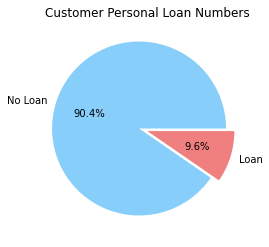

In [73]:
explode = (0.1, 0)
plt.pie(df["Personal Loan"].value_counts(), labels=["No Loan","Loan"],  autopct='%1.1f%%', explode=explode, colors=['lightskyblue', 'lightcoral']);
plt.title("Customer Personal Loan Numbers");

The personal loan column is whether or not the customer accepted the offer on the last marketing campaign. 
As shown above, the majority of the dataset is those customers who didn't take a personal loan. This means feature selection will play an important role in modelling. 

In [74]:
group_loan = df.groupby("Personal Loan")
group_loan.mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.728982,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905347,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [75]:
group_loan["Mortgage"].describe()

,count,mean,std,min,25%,50%,75%,max
Personal Loan,,,,,,,,
0,4520.0,51.789381,92.038931,0.0,0.0,0.0,98.0,635.0
1,480.0,100.845833,160.847862,0.0,0.0,0.0,192.5,617.0


In [76]:
group_loan["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Personal Loan,,,,,,,,
0,4520.0,66.237389,40.578534,8.0,35.0,59.0,84.0,224.0
1,480.0,144.745833,31.584429,60.0,122.0,142.5,172.0,203.0


In [77]:
group_loan["CCAvg"].describe()

,count,mean,std,min,25%,50%,75%,max
Personal Loan,,,,,,,,
0,4520.0,1.728982,1.567654,0.0,0.6,1.4,2.30,8.8
1,480.0,3.905347,2.097679,0.0,2.6,3.8,5.35,10.0


Here we can see the means for each column grouped by loan and no loan customers. From the averages above, it seems like those customers taking personal loans could possibly be higher income, with higher mortages. Let's explore these two columns further to see. The mortgage column contains a lot of 0 values for customers who don't have a mortgage. This will be a big factor to the overall means, especially as no loan group is considerable larger than the loan group. 


Another column that stands out here, is "CCAvg", which is average spending on credit cards per month. 

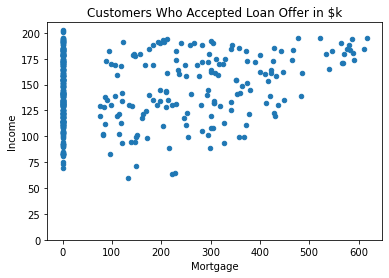

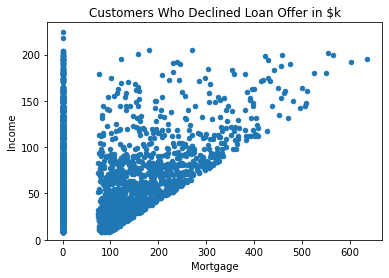

In [78]:
no_loans = df[df["Personal Loan"] ==0]
loans = df[df["Personal Loan"] ==1]


loans.plot(kind="scatter", x="Mortgage", y="Income");
plt.title("Customers Who Accepted Loan Offer in $k");
plt.ylim(ymin=0);
no_loans.plot(kind="scatter", x="Mortgage", y="Income");
plt.title("Customers Who Declined Loan Offer in $k");
plt.ylim(ymin=0);


The data for mortgage seems varied for those customers who did accept the loan. It looks like there is a small cluster of the top-end mortgages accepting the loan. As there is a lot of data for customers who don't have a mortgage, this will impact the modelling. There does seem to be a small trend with high incomes and a mortgage accepting the loan, but I'm not sure this is clear enough for modelling. Mortgages will most likely not be used as a feature for modelling, so now let's explore some more features before modelling. 

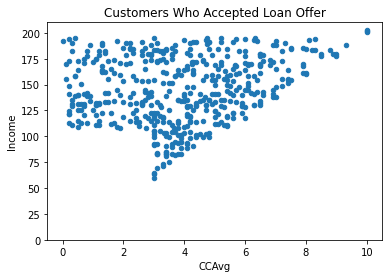

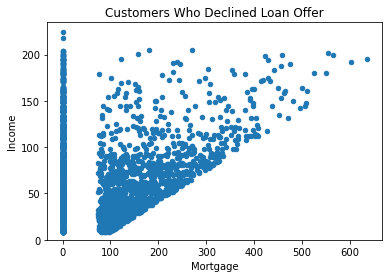

In [79]:
loans.plot(kind="scatter", x="CCAvg", y="Income");
plt.title("Customers Who Accepted Loan Offer");
plt.ylim(ymin=0);
no_loans.plot(kind="scatter", x="Mortgage", y="Income");
plt.title("Customers Who Declined Loan Offer");
plt.ylim(ymin=0);

From the scatterplots above, we can see the gap in the second plot in the bottom left. This indicates that lower income customers with low monthly credit card averages, were not taking the offer at all. The opposite trend can be seen in the top graph for no-loan customers. Where the data is populated around the square in the bottom left, under 3 CCAvg and $100k income.

In [80]:
loans["Securities Account"].value_counts()

0    420
1     60
Name: Securities Account, dtype: int64

In [81]:
no_loans["Securities Account"].value_counts()

0    4058
1     462
Name: Securities Account, dtype: int64

In [82]:
loans["CD Account"].value_counts()

0    340
1    140
Name: CD Account, dtype: int64

In [83]:
no_loans["CD Account"].value_counts()

0    4358
1     162
Name: CD Account, dtype: int64

In [84]:
loans["CreditCard"].value_counts()

0    337
1    143
Name: CreditCard, dtype: int64

In [85]:
no_loans["CreditCard"].value_counts()

0    3193
1    1327
Name: CreditCard, dtype: int64

The value counts above are to explore some more features before modelling. Securites Account is defined as: Does the customer have a securities account with the bank? CD Account is defined as: Does the customer have a certificate of deposit (CD) account with the bank?

The accepted loan group have nearly as many customers who have a CD account than the declined loan group. Considering the distribution in data, it seems like this could be a useful feature to use for modelling. There doesn't seem to be too much correlation with a securities account or credit card issued by Universal Bank though. 


In [91]:
corr = df.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


A final look at correlation before modelling. From the stats above, we can see that the strongest correlations come from the columns that have been mentioned so far.
Features to be used for modelling:
- Personal Loan (Y Prediction)
- Income
- CCAvg
- CD Account
- Mortgage (Will be left in to possible experiment modelling with)